# 35. Нейронные сети и глубокое обучение

На этой неделе мы узнаем о нейронных сетях и построим модель для классификации изображений одежды.


## 35.1 Классификация одежды

## Датасет

* Ссылка на full (Google Drive): https://drive.google.com/file/d/1IATFPd6JoCe3W-Fdlf1ac6iyGuLwXet1/view?usp=sharing
* Ссылка на small (Google Drive): https://drive.google.com/file/d/1lgVaHvmhbtd4vZDQ-xP_jwdRsWhuQzJ_/view?usp=sharing

# Визуализация нейронных сетей:

* https://www.youtube.com/watch?v=RJCIYBAAiEI&t=266s&ab_channel=3Blue1BrowntranslatedbySciberia

## 35.2 TensorFlow и Keras

* Установка TensorFlow
* Загрузка изображений

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

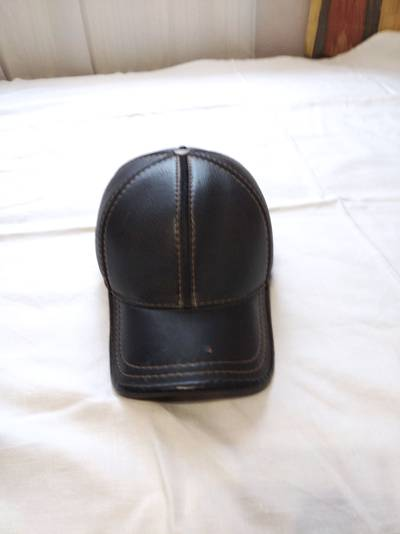

In [ ]:
path = '/content/drive/MyDrive/clothing-dataset-small/test/hat'
name = '2a12baab-f020-42e3-8e6b-5d82e3ed0b55.jpg'
fullname = f'{path}/{name}'
load_img(fullname)


In [ ]:
img = load_img(fullname, target_size=(299, 299))

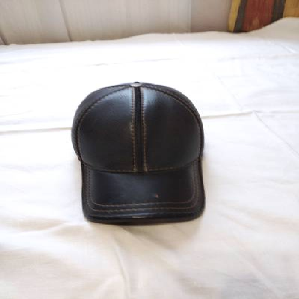

In [ ]:
img

In [ ]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x79E82E3C1FF0>


array([[[186, 175, 169],
        [185, 174, 168],
        [184, 173, 167],
        ...,
        [141,  98,  53],
        [134,  91,  46],
        [126,  83,  40]],

       [[185, 174, 168],
        [185, 174, 168],
        [185, 174, 168],
        ...,
        [140,  97,  52],
        [133,  90,  45],
        [128,  85,  42]],

       [[182, 171, 165],
        [184, 173, 167],
        [186, 175, 169],
        ...,
        [138,  95,  50],
        [131,  88,  43],
        [133,  90,  47]],

       ...,

       [[225, 224, 220],
        [225, 224, 220],
        [226, 225, 221],
        ...,
        [202, 197, 194],
        [202, 197, 194],
        [200, 195, 192]],

       [[225, 224, 220],
        [225, 224, 220],
        [225, 224, 220],
        ...,
        [202, 197, 194],
        [202, 197, 194],
        [201, 196, 193]],

       [[226, 225, 221],
        [225, 224, 220],
        [225, 224, 220],
        ...,
        [191, 186, 183],
        [190, 185, 182],
        [190, 185, 182]]], dtype=uint8)
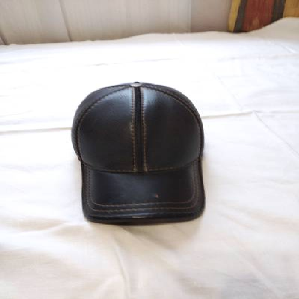

In [ ]:
x = np.array(img)
x

In [ ]:
x.shape

(299, 299, 3)

## 35.3 Предварительно обученные сверточные нейронные сети (convolutional neural networks)

* Набор данных Imagenet: https://www.image-net.org/
* Предварительно обученные модели: https://keras.io/api/applications/


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 5s 0us/step


In [ ]:
X = np.array([x])

In [ ]:
X

array([[[[186, 175, 169],
         [185, 174, 168],
         [184, 173, 167],
         ...,
         [141,  98,  53],
         [134,  91,  46],
         [126,  83,  40]],

        [[185, 174, 168],
         [185, 174, 168],
         [185, 174, 168],
         ...,
         [140,  97,  52],
         [133,  90,  45],
         [128,  85,  42]],

        [[182, 171, 165],
         [184, 173, 167],
         [186, 175, 169],
         ...,
         [138,  95,  50],
         [131,  88,  43],
         [133,  90,  47]],

        ...,

        [[225, 224, 220],
         [225, 224, 220],
         [226, 225, 221],
         ...,
         [202, 197, 194],
         [202, 197, 194],
         [200, 195, 192]],

        [[225, 224, 220],
         [225, 224, 220],
         [225, 224, 220],
         ...,
         [202, 197, 194],
         [202, 197, 194],
         [201, 196, 193]],

        [[226, 225, 221],
         [225, 224, 220],
         [225, 224, 220],
         ...,
         [191, 186, 183],
        

In [ ]:
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
X

array([[[[ 0.45882356,  0.37254906,  0.32549024],
         [ 0.45098042,  0.36470592,  0.3176471 ],
         [ 0.4431373 ,  0.35686278,  0.30980396],
         ...,
         [ 0.10588241, -0.23137254, -0.58431375],
         [ 0.05098045, -0.2862745 , -0.6392157 ],
         [-0.01176471, -0.3490196 , -0.6862745 ]],

        [[ 0.45098042,  0.36470592,  0.3176471 ],
         [ 0.45098042,  0.36470592,  0.3176471 ],
         [ 0.45098042,  0.36470592,  0.3176471 ],
         ...,
         [ 0.09803927, -0.23921567, -0.5921569 ],
         [ 0.04313731, -0.29411763, -0.64705884],
         [ 0.00392163, -0.3333333 , -0.67058825]],

        [[ 0.427451  ,  0.3411765 ,  0.2941177 ],
         [ 0.4431373 ,  0.35686278,  0.30980396],
         [ 0.45882356,  0.37254906,  0.32549024],
         ...,
         [ 0.082353  , -0.25490195, -0.60784316],
         [ 0.02745104, -0.3098039 , -0.6627451 ],
         [ 0.04313731, -0.29411763, -0.6313726 ]],

        ...,

        [[ 0.7647059 ,  0.75686276,  0

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [ ]:
pred

array([[5.16807486e-04, 2.64353323e-04, 1.92173538e-04, 4.91126964e-04,
        3.23458604e-04, 4.73523454e-04, 6.27259782e-04, 2.90040189e-04,
        7.17305753e-04, 6.63057843e-04, 2.74655991e-04, 3.16796650e-04,
        3.00246116e-04, 4.52101696e-04, 2.99663661e-04, 4.34130634e-04,
        4.25523322e-04, 3.36458877e-04, 2.15646476e-04, 4.31897788e-04,
        1.78765622e-03, 5.34877880e-04, 6.24254404e-04, 4.79392183e-04,
        5.10536949e-04, 6.95923460e-04, 5.02376177e-04, 7.24637939e-04,
        7.47108366e-04, 3.01739638e-04, 5.75521088e-04, 3.00824060e-04,
        4.27198916e-04, 5.74889185e-04, 1.05162710e-03, 4.54132725e-03,
        6.14518824e-04, 1.31356786e-03, 4.37321956e-04, 3.74066090e-04,
        7.08339969e-04, 7.19265256e-04, 6.05804846e-04, 4.38252377e-04,
        1.02709862e-03, 9.84534272e-04, 6.64729625e-04, 1.95040629e-04,
        9.08300397e-04, 4.78552858e-04, 3.23556713e-04, 2.98978615e-04,
        8.91720352e-04, 1.47076556e-03, 7.17338582e-04, 5.776223

In [ ]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 1us/step


[[('n03680355', 'Loafer', 0.13958995),
  ('n04023962', 'punching_bag', 0.045431506),
  ('n03124043', 'cowboy_boot', 0.041995604),
  ('n04548362', 'wallet', 0.018152783),
  ('n04026417', 'purse', 0.015328116)]]

## 35.4 Сверточные нейронные сети (Convolutional Neural Networks (CNN))

* Типы слоев: сверточные (convolutional) и полносвязные (dense)
* Сверточные слои (Convolutional layers) и фильтры
* Полносвязные слои (Dense layers)

Есть и другие слои. Читайте здесь: https://cs231n.github.io/

## 35.5 Перенос обучения (Transfer Learning)

* Чтение данных с помощью ImageDataGenerator
* Обучение Xception на изображениях меньшего размера (150x150)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/drive/MyDrive/clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
X, y = next(train_ds)

In [ ]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
X.shape

(32, 150, 150, 3)

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/content/drive/MyDrive/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
learning_rate = 0.05
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
96/96 [==============================] - 2413s 25s/step - loss: 5.3144 - accuracy: 0.6398 - val_loss: 5.2937 - val_accuracy: 0.6716
Epoch 2/5
96/96 [==============================] - 18s 184ms/step - loss: 2.5032 - accuracy: 0.7868 - val_loss: 4.2966 - val_accuracy: 0.7390
Epoch 3/5
96/96 [==============================] - 17s 178ms/step - loss: 1.3832 - accuracy: 0.8566 - val_loss: 3.9562 - val_accuracy: 0.7683
Epoch 4/5
96/96 [==============================] - 17s 179ms/step - loss: 1.5755 - accuracy: 0.8605 - val_loss: 3.9887 - val_accuracy: 0.7419
Epoch 5/5
96/96 [==============================] - 17s 176ms/step - loss: 1.3039 - accuracy: 0.8706 - val_loss: 4.6482 - val_accuracy: 0.7361


In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

NameError: name 'plt' is not defined

## 35.6 Корректировка скорости обучения

* Что такое скорость обучения
* Пробуем разные значения

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 22s 195ms/step - loss: 1.9096 - accuracy: 0.3735 - val_loss: 1.5915 - val_accuracy: 0.4897
Epoch 2/10
96/96 [==============================] - 18s 182ms/step - loss: 1.3951 - accuracy: 0.5587 - val_loss: 1.2516 - val_accuracy: 0.6217
Epoch 3/10
96/96 [==============================] - 18s 184ms/step - loss: 1.1506 - accuracy: 0.6418 - val_loss: 1.0744 - val_accuracy: 0.6804
Epoch 4/10
96/96 [==============================] - 18s 186ms/step - loss: 1.0087 - accuracy: 0.6838 - val_loss: 0.9621 - val_accuracy: 0.7214
Epoch 5/10
96/96 [==============================] - 18s 183ms/step - loss: 0.9154 - accuracy: 0.7122 - val_loss: 0.8908 - val_accuracy: 0.7302
Epoch 6/10
96/96 [==============================] - 18s 191ms/step - loss: 0.8461 - accuracy: 0.7282 - val_loss: 0.8404 - val_accuracy: 0.7537
Epoch 7/10
96/96 [==============================] - 17s 181ms/step - loss: 0.7921 - accuracy: 0.7458 - val_loss: 0.7979 - val_accuracy:

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
del scores[0.1]
del scores[0.0001]

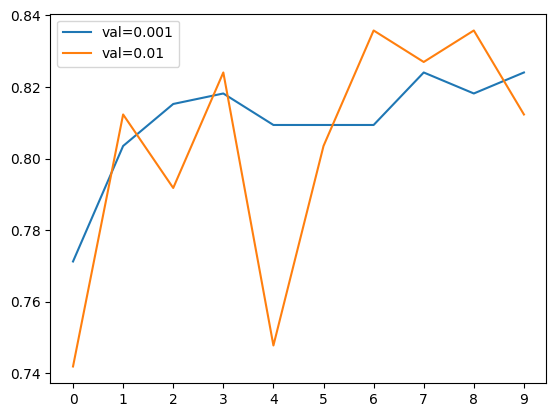

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

## 35.7 Создание контрольных точек

* Сохранение лучшей модели
* Обучение модели с обратными вызовами (callbacks)

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.1128 - accuracy: 0.6261

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 22s 196ms/step - loss: 1.1128 - accuracy: 0.6261 - val_loss: 0.7358 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 18s 188ms/step - loss: 0.6361 - accuracy: 0.7767 - val_loss: 0.5953 - val_accuracy: 0.8240
Epoch 3/10
96/96 [==============================] - 17s 180ms/step - loss: 0.5034 - accuracy: 0.8318 - val_loss: 0.5745 - val_accuracy: 0.8299
Epoch 4/10
96/96 [==============================] - 17s 177ms/step - loss: 0.4323 - accuracy: 0.8660 - val_loss: 0.5925 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 17s 177ms/step - loss: 0.3744 - accuracy: 0.8859 - val_loss: 0.5473 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 18s 186ms/step - loss: 0.3248 - accuracy: 0.9065 - val_loss: 0.5374 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 17s 180ms/step - loss: 0.2914 - accuracy: 0.9179 - val_loss: 0.5287 - val_accuracy: 0.8387
Epoch 8/10

## 35.8 Добавление дополнительных слоёв

* Добавление одного внутреннего полносвязного слоя
* Экспериментирование с разными размерами внутреннего слоя

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 23s 205ms/step - loss: 1.6593 - accuracy: 0.4250 - val_loss: 1.2792 - val_accuracy: 0.5953
Epoch 2/10
96/96 [==============================] - 17s 178ms/step - loss: 1.0861 - accuracy: 0.6486 - val_loss: 0.9262 - val_accuracy: 0.7097
Epoch 3/10
96/96 [==============================] - 18s 184ms/step - loss: 0.7588 - accuracy: 0.7451 - val_loss: 0.7644 - val_accuracy: 0.7566
Epoch 4/10
96/96 [==============================] - 18s 182ms/step - loss: 0.5950 - accuracy: 0.7989 - val_loss: 0.6733 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 17s 180ms/step - loss: 0.5023 - accuracy: 0.8426 - val_loss: 0.6829 - val_accuracy: 0.7742
Epoch 6/10
96/96 [==============================] - 18s 185ms/step - loss: 0.4334 - accuracy: 0.8677 - val_loss: 0.6315 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 17s 176ms/step - loss: 0.3732 - accuracy: 0.8859 - val_loss: 0.6270 - val_accuracy: 0.8

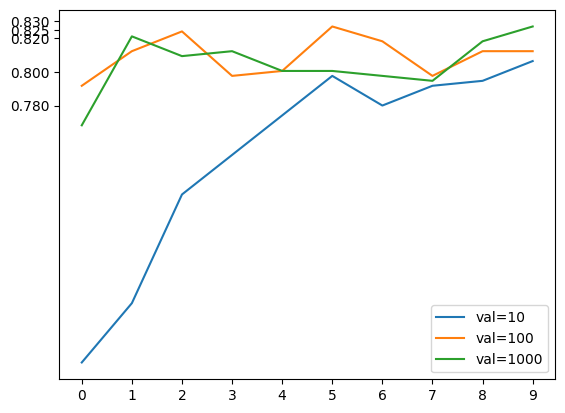

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 35.9 Регуляризация и dropout

* Регуляризация путем замораживания части сети
* Добавление dropout в нашу модель
* Экспериментирование с разными значениями

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 35.10 Аугментация данных

* Различные методы аугментации данных
* Обучение модели с аугментациями
* Как выбирать методы аугментации данных?

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 35.11 Обучение более крупной модели

* Обучение модели размером 299x299

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

## 35.12 Использование модели

* Загрузка модели
* Оценка модели
* Получение прогнозов

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
model = keras.models.load_model('xception_v4_1_13_0.903.h5')

In [ ]:
model.evaluate(test_ds)

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))

## 35.13 Итог

* Мы можем использовать предварительно обученные модели для общей классификации изображений
* Сверточные слои позволяют преобразовать изображение в вектор
* Полносвязные слои используют этот вектор для выработки прогнозов
* Вместо обучения модели с нуля, мы можем использовать перенос обучения и повторно использовать уже обученные сверточные слои
* Сначала обучите маленькую модель (150x150), прежде чем обучать большую (299x299)
* Скорость обучения - насколько быстро обучается модель. Быстрые ученики не всегда являются лучшими
* Мы можем сохранять лучшую модель с помощью обратных вызовов и создания контрольных точек
* Чтобы избежать переобучения, используйте dropout и аугментацию.

## 35.14 Исследуйте дальше

* Добавьте больше данных, например, Zalando и т.д.
* Albumentations - другой способ создания аугментаций
* Используйте PyTorch или MXNet вместо TensorFlow/Keras
* Помимо Xception, существуют другие архитектуры - попробуйте их
Другие проекты:

* Коты против собак
* Хотдог или не хотдог
* Категории изображений

